In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as pp
from sklearn.ensemble import IsolationForest

%matplotlib inline

In [43]:
train = pd.read_csv("../organized_data/train_organized.csv")
train

,individualnumber,category_number,hakkedis_amt,odul_amt,response,total_money_spent,total_discount,sanal_percent,shop_count,months_since_last_shopping,...,level3_relevant_category_volume_per_day,level4_relevant_category_volume_per_day,level1_relevant_category_quantity_per_day,level2_relevant_category_quantity_per_day,level3_relevant_category_quantity_per_day,level4_relevant_category_quantity_per_day,total_money_spent_per_day,discount_per_day,odul/hakkedis,is_large_city
0,94230288,9000,21.0,2.0,0,7118.94741,177.489978,0.015625,64.0,1.0,...,0.675378,0.675378,0.270924,0.131653,0.100840,0.100840,19.941029,0.497171,0.095238,True
1,4684087,9000,17.0,1.0,0,10192.64563,31907.260487,0.000000,30.0,1.0,...,0.342718,0.342718,0.113528,0.038835,0.038835,0.038835,32.985908,103.259743,0.058824,False
2,92472145,9058,24.0,3.0,0,35113.80415,10060.118391,0.013514,518.0,1.0,...,1.806940,0.330191,3.309934,0.396175,0.368852,0.030055,95.939356,27.486662,0.125000,True
3,88026681,9030,22.0,2.0,0,11559.66676,231.976316,0.950000,40.0,1.0,...,0.396143,0.396143,0.040000,0.022857,0.022857,0.022857,33.027619,0.662789,0.090909,True
4,98127795,9001,38.0,3.0,0,461.77380,1.738800,0.000000,4.0,3.0,...,0.202128,0.202128,0.058511,0.010638,0.010638,0.010638,2.456244,0.009249,0.078947,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13110,97214433,9059,27.0,2.0,0,16893.83688,1598.015176,0.009881,506.0,1.0,...,0.232356,0.161534,0.060274,0.019178,0.019178,0.013699,46.284485,4.378124,0.074074,True
13111,96841665,9004,65.0,6.0,0,13089.84113,500.344604,0.000000,40.0,1.0,...,0.748507,0.748507,0.065672,0.014925,0.014925,0.014925,39.074153,1.493566,0.092308,True
13112,98445787,9044,33.0,3.0,0,2432.60788,244.758629,0.000000,39.0,1.0,...,0.077468,0.077468,0.030342,0.010734,0.002331,0.002331,6.814028,0.685598,0.090909,False
13113,13781030,9004,66.0,6.0,0,1242.70635,6.080452,0.090909,11.0,1.0,...,0.202663,0.202663,0.002959,0.002959,0.002959,0.002959,3.676646,0.017990,0.090909,False


In [44]:
# Anomaly detection among response = 0 using sklearn.IsolationForest
anomalies = 0.02


clf = IsolationForest(n_estimators=100, warm_start=True)
_train = train.copy()
_train.drop(columns=["level1_relevant_category_volume_per_day", "level2_relevant_category_volume_per_day", "level3_relevant_category_volume_per_day", "level4_relevant_category_volume_per_day", "level1_relevant_category_quantity_per_day", "level2_relevant_category_quantity_per_day", "level3_relevant_category_quantity_per_day", "level4_relevant_category_quantity_per_day", "discount_per_day", "total_money_spent_per_day"], inplace=True)
_train["gender"].fillna("K")
_train = _train.fillna(0)
_train[_train["age"] < 0] = _train.age.median()

x = _train[_train["response"] == 0]

# to_model_columns = ["level1_relevant_category_volume", "level2_relevant_category_volume", "level3_relevant_category_volume", "level4_relevant_category_volume", "level1_relevant_category_quantity", "level2_relevant_category_quantity", "level3_relevant_category_quantity", "level4_relevant_category_quantity"]
to_model_columns = ["level1_relevant_category_volume", "level1_relevant_category_quantity", "total_money_spent", "total_discount", "sanal_percent", "days_shopped", "months_since_last_shopping", "shop_count"]

x.columns

from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=anomalies, \
                        max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(x[to_model_columns])
pred = clf.predict(x[to_model_columns])

x['anomaly']=pred
outliers=x.loc[x['anomaly']==-1]


outlier_index=list(outliers.index)

# Find the number of anomalies and normal points here points classified -1 are anomalous
print(x['anomaly'].value_counts())
x_anomalies = x[x["anomaly"] == -1]


train_anomalies_dropped = pd.merge(_train, x_anomalies[["individualnumber", "anomaly"]], how="left", on="individualnumber")
train_anomalies_dropped.fillna(1, inplace=True)
train_anomalies_dropped = train_anomalies_dropped[train_anomalies_dropped["anomaly"] != -1]
train_anomalies_dropped.drop(columns="anomaly", inplace=True)
train_anomalies_dropped

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


 1    12644
-1      259
Name: anomaly, dtype: int64


/var/folders/p4/w5cgd6hs1tsd7tddgjp26yn80000gn/T/ipykernel_53156/3198876011.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['anomaly']=pred


,individualnumber,category_number,hakkedis_amt,odul_amt,response,total_money_spent,total_discount,sanal_percent,shop_count,months_since_last_shopping,...,level1_relevant_category_volume,level2_relevant_category_volume,level3_relevant_category_volume,level4_relevant_category_volume,level1_relevant_category_quantity,level2_relevant_category_quantity,level3_relevant_category_quantity,level4_relevant_category_quantity,odul/hakkedis,is_large_city
0,94230288,9000,21.0,2.0,0,7118.94741,177.489978,0.015625,64.0,1.0,...,996.749,487.360,241.110,241.110,96.720,47.000,36.000,36.000,0.095238,True
1,4684087,9000,17.0,1.0,0,10192.64563,31907.260487,0.000000,30.0,1.0,...,461.227,105.900,105.900,105.900,35.080,12.000,12.000,12.000,0.058824,False
3,88026681,9030,22.0,2.0,0,11559.66676,231.976316,0.950000,40.0,1.0,...,308.150,138.650,138.650,138.650,14.000,8.000,8.000,8.000,0.090909,True
4,98127795,9001,38.0,3.0,0,461.77380,1.738800,0.000000,4.0,3.0,...,115.700,38.000,38.000,38.000,11.000,2.000,2.000,2.000,0.078947,False
5,101834804,9046,85.0,8.0,0,180.57000,19.349210,0.000000,6.0,1.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.094118,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13110,97214433,9059,27.0,2.0,0,16893.83688,1598.015176,0.009881,506.0,1.0,...,473.770,84.810,84.810,58.960,22.000,7.000,7.000,5.000,0.074074,True
13111,96841665,9004,65.0,6.0,0,13089.84113,500.344604,0.000000,40.0,1.0,...,408.990,250.750,250.750,250.750,22.000,5.000,5.000,5.000,0.092308,True
13112,98445787,9044,33.0,3.0,0,2432.60788,244.758629,0.000000,39.0,1.0,...,168.546,99.416,27.656,27.656,10.832,3.832,0.832,0.832,0.090909,False
13113,13781030,9004,66.0,6.0,0,1242.70635,6.080452,0.090909,11.0,1.0,...,68.500,68.500,68.500,68.500,1.000,1.000,1.000,1.000,0.090909,False


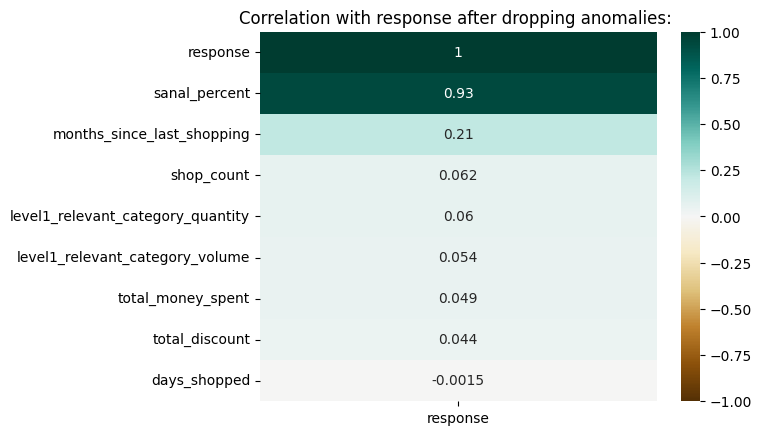

In [45]:
correlation = train_anomalies_dropped[["response", "level1_relevant_category_volume", "level1_relevant_category_quantity", "sanal_percent", "total_discount", "total_money_spent", "days_shopped", "months_since_last_shopping", "shop_count"]].corr()
# sns.heatmap(correlation["response"], annot=True)
# plt.title("Correlation after anomaly drop")
# plt.show()

sns.heatmap(correlation[['response']].sort_values(by='response', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title("Correlation with response after dropping anomalies: ")
plt.show()

In [46]:
# Output the cleaned data into csv file:
path = "../cleaned_data/"

train_anomalies_dropped.to_csv(f"{path}/train_cleaned_IsolationForest.csv", index=False)

In [47]:
test = pd.read_csv("../organized_data/test_organized.csv")

# Per day columns are not anymore in use because there is no visible correlation between response and them.
test_cleaned = test.drop(columns=["level1_relevant_category_volume_per_day", "level2_relevant_category_volume_per_day", "level3_relevant_category_volume_per_day", "level4_relevant_category_volume_per_day", "level1_relevant_category_quantity_per_day", "level2_relevant_category_quantity_per_day", "level3_relevant_category_quantity_per_day", "level4_relevant_category_quantity_per_day", "discount_per_day", "total_money_spent_per_day"])
test_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13236 entries, 0 to 13235
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   individualnumber                   13236 non-null  int64  
 1   category_number                    13236 non-null  int64  
 2   hakkedis_amt                       13236 non-null  float64
 3   odul_amt                           13236 non-null  float64
 4   total_money_spent                  13225 non-null  float64
 5   total_discount                     13218 non-null  float64
 6   sanal_percent                      13225 non-null  float64
 7   shop_count                         13225 non-null  float64
 8   months_since_last_shopping         13225 non-null  float64
 9   days_shopped                       13225 non-null  float64
 10  gender                             13232 non-null  object 
 11  city_code                          13236 non-null  flo

In [48]:
# Output the cleaned data into csv file:
path = "../cleaned_data/"
test_cleaned.to_csv(f"{path}/test_cleaned.csv", index=False)